In [1]:
import pandas as pd                 # for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

print("1 \n")

# check out the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)



print("2 \n")

# look at a few rows using the DataFrame.head() method
# train.head()
print(train.head())

#to do some plotting
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 

Train data shape: (49108, 49)
Test data shape: (49108, 48)
2 

   Id  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  \
0   0       3          1  Hot Water Rad  Y        2.0      9      5  1910.0   
1   1       3          2  Hot Water Rad  Y        1.0     10      5  1913.0   
2   2       3          1      Warm Cool  Y        2.0      5      3  1917.0   
3   3       3          1      Warm Cool  Y        1.0      8      3  1908.0   
4   4       3          1  Hot Water Rad  Y        2.0      9      3  1908.0   

   YR_RMDL    ...      ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD CENSUS_TRACT  \
0   2009.0    ...           Old City 2    040 D Old City 2       4201.0   
1      NaN    ...           Old City 2    040 D Old City 2       4201.0   
2   2000.0    ...           Old City 2    040 D Old City 2       4201.0   
3   2006.0    ...           Old City 2    040 D Old City 2       4201.0   
4   2013.0    ...           Old City 2    040 D Old City 2       4201.0   

  CENSU

3 

count    4.910800e+04
mean     9.314342e+05
std      7.001692e+06
min      1.000000e+00
25%      2.390000e+05
50%      3.999990e+05
75%      6.545000e+05
max      1.374275e+08
Name: PRICE, dtype: float64
4 

Skew is: 18.377620728831424


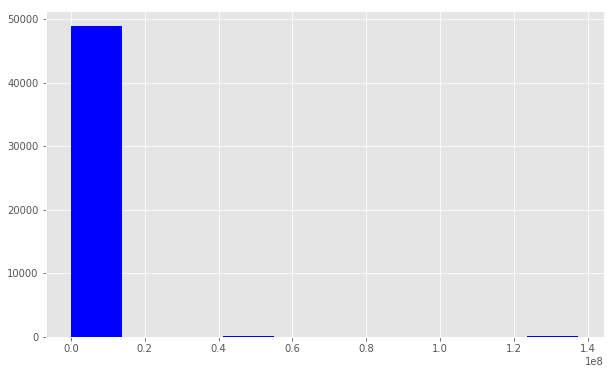

5 


 Skew is: 0.2562003044599395


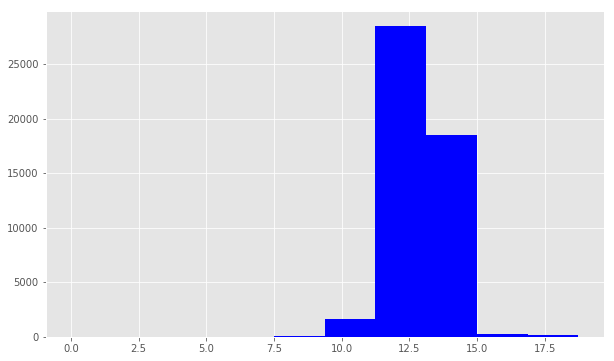

In [2]:
#######################################################
#  2. Explore the data and engineer Features          ###
#######################################################

print("3 \n")

# to get more information like count, mean, std, min, max etc
# train.SalePrice.describe()
print (train.PRICE.describe())

print("4 \n")

# to plot a histogram of SalePrice
print ("Skew is:", train.PRICE.skew())
plt.hist(train.PRICE, color='blue')
plt.show()

print("5 \n")

# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
target = np.log(train.PRICE)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

train["GBA"].fillna(1725.786303972366,inplace=True)
train["GRADE"].fillna(train["GRADE"].mode(),inplace=True)
train["CNDTN"].fillna(train["CNDTN"].mode(),inplace=True)

train['IsNew'] = train['AYB'].apply(lambda x: 1 if x > 2000 else 0)
train['IsRMDL'] = train['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
train["IsLARGE"] = train["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)


6 

Id                int64
BATHRM            int64
HF_BATHRM         int64
NUM_UNITS       float64
ROOMS             int64
BEDRM             int64
AYB             float64
YR_RMDL         float64
EYB               int64
STORIES         float64
SALE_NUM          int64
GBA             float64
BLDG_NUM          int64
KITCHENS        float64
FIREPLACES        int64
USECODE           int64
LANDAREA          int64
CMPLX_NUM       float64
LIVING_GBA      float64
ZIPCODE         float64
LATITUDE        float64
LONGITUDE       float64
CENSUS_TRACT    float64
X               float64
Y               float64
PRICE           float64
IsNew             int64
IsRMDL            int64
IsLARGE           int64
dtype: object
7 

PRICE       1.000000
IsRMDL      0.079547
AYB         0.055470
KITCHENS    0.049589
EYB         0.049022
Name: PRICE, dtype: float64 

ROOMS          -0.039240
BEDRM          -0.046389
CENSUS_TRACT   -0.068283
X              -0.095282
LONGITUDE      -0.095285
Name: PRICE, dtype: fl

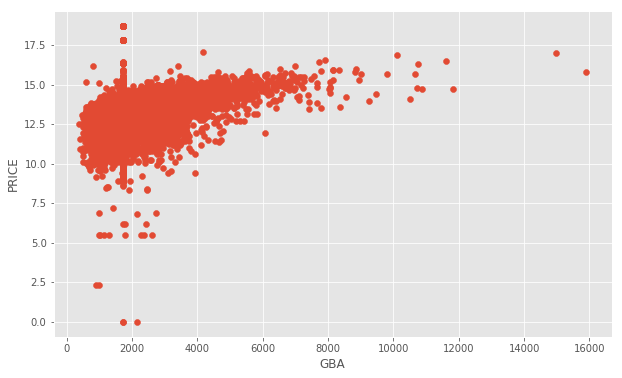

In [3]:
#######################################################
#   Working with Numeric Features                   ###
#######################################################

print("6 \n")

# return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

print("7 \n")

# displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['PRICE'].sort_values(ascending=False)[:5], '\n')
print (corr['PRICE'].sort_values(ascending=False)[-5:])

print("8 \n")

"""
#to get the unique values that a particular column has.
#train.OverallQual.unique()
print(train.OverallQual.unique())
"""
print("9 \n")
"""
#investigate the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)
"""
print("10 \n")
"""
#visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
"""
print("11 \n")
"""
#to generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()
"""
print("12 \n")

# do the same for GarageArea.
plt.scatter(x=train['GBA'], y=target)
plt.ylabel('PRICE')
plt.xlabel('GBA')
plt.show()

13 



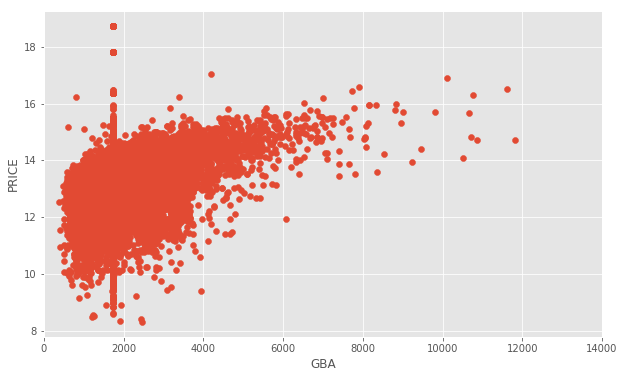

In [12]:
#######################################################
# create a new dataframe with some outliers removed ###
#######################################################

print("13 \n")

# create a new dataframe with some outliers removed
train = train[train['GBA'] < 12000]
train["LOGPRICE"] = np.log(train["PRICE"])
train = train[train["LOGPRICE"]>7.5]

# display the previous graph again without outliers
plt.scatter(x=train['GBA'], y=np.log(train.PRICE))
plt.xlim(0,14000)     # This forces the same scale as before
plt.ylabel('PRICE')
plt.xlabel('GBA')
plt.show()

In [13]:
######################################################
#   Handling Null Values                            ##
######################################################

print("14 \n")

# create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

print("15 \n")
"""
#to return a list of the unique values
print ("Unique values are:", train.MiscFeature.unique())
"""

14 

                    Null Count
Feature                       
CMPLX_NUM                29035
LIVING_GBA               29035
YR_RMDL                  20407
FULLADDRESS              20214
NATIONALGRID             20212
CENSUS_BLOCK             20212
CITY                     20212
STATE                    20212
STORIES                  20069
GRADE                    20051
CNDTN                    20051
EXTWALL                  20051
ROOF                     20051
INTWALL                  20051
KITCHENS                 20051
STYLE                    20051
STRUCT                   20051
NUM_UNITS                20051
ASSESSMENT_SUBNBHD       10121
AYB                         55
Y                           47
X                           47
QUADRANT                    47
SALEDATE                     1
EYB                          0
15 



'\n#to return a list of the unique values\nprint ("Unique values are:", train.MiscFeature.unique())\n'

In [14]:
######################################################
#   Wrangling the non-numeric Features              ##
######################################################

print("16 \n")

# consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())

16 

              HEAT     AC             SALEDATE QUALIFIED    STYLE      STRUCT  \
count        49086  49086                49085     49086    29035       29035   
unique          14      3                 6225         2       16           8   
top     Forced Air      Y  2007-04-10 00:00:00         Q  2 Story  Row Inside   
freq         19682  39800                  123     38058    22145       11783   

          GRADE  CNDTN       EXTWALL      ROOF   ...     \
count     29035  29035         29035     29035   ...      
unique       12      6            23        15   ...      
top     Average   Good  Common Brick  Built Up   ...      
freq       9840  12879         21768      8873   ...      

                  FULLADDRESS        CITY  STATE        NATIONALGRID  \
count                   28872       28874  28874               28874   
unique                  28867           1      1               28865   
top     3310 REAR P STREET NW  WASHINGTON     DC  18S UJ 28001 06126   
freq 

19 



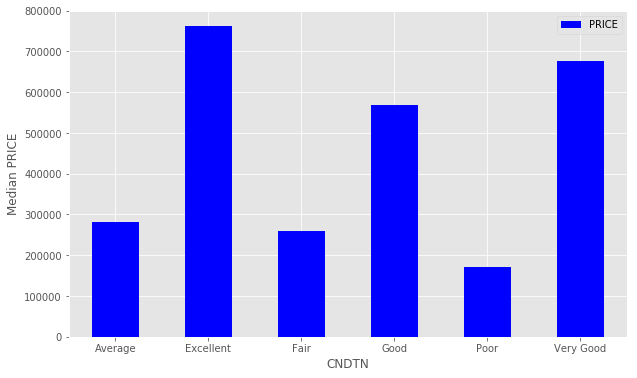

20 



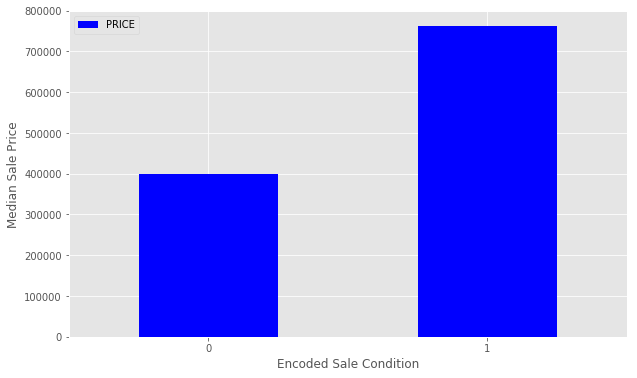

In [15]:
print("19 \n")

# look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='CNDTN', values='PRICE', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('CNDTN')
plt.ylabel('Median PRICE')
plt.xticks(rotation=0)
plt.show()

# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Excellent' else 0
train['enc_condition'] = train.CNDTN.apply(encode)
test['enc_condition'] = test.CNDTN.apply(encode)

print("20 \n")

# explore this newly modified feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='PRICE', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [16]:
######################################################################################################
#   Dealing with missing values                                                                      #
#   We'll fill the missing values with an average value and then assign the results to data          #
#   This is a method of interpolation                                                                #
######################################################################################################
data = train.select_dtypes(include=[np.number])#.interpolate().dropna()

print("21 \n")
# Check if the all of the columns have 0 null values.
# sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

print("22 \n")

21 

9
22 



In [17]:
data.shape

(49086, 31)

In [18]:
######################################################
#  3. Build a linear model                             ##
######################################################

# separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.

y = np.log(train.PRICE)
X = data.drop(['PRICE','Id',"LIVING_GBA","CMPLX_NUM","AYB","YR_RMDL","STORIES","X","Y","NUM_UNITS","KITCHENS","LOGPRICE"], axis=1)
print(X.isnull().sum(),data.shape)
X=pd.get_dummies(X)

#data["GRADE"].fillna(data["GRADE"].mode(),inplace=True)
#data["CNDTN"].fillna(data["CNDTN"].mode(),inplace=True)
# exclude ID from features since Id is just an index with no relationship to SalePrice.

#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
# also state how many percentage from train data set, we want to take as test data set
# In this example, about 33% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

BATHRM           0
HF_BATHRM        0
ROOMS            0
BEDRM            0
EYB              0
SALE_NUM         0
GBA              0
BLDG_NUM         0
FIREPLACES       0
USECODE          0
LANDAREA         0
ZIPCODE          0
LATITUDE         0
LONGITUDE        0
CENSUS_TRACT     0
IsNew            0
IsRMDL           0
IsLARGE          0
enc_condition    0
dtype: int64 (49086, 31)


23 

R^2 is: 
 0.4224319323289288
24 

RMSE is: 
 0.4545403310567537
25 



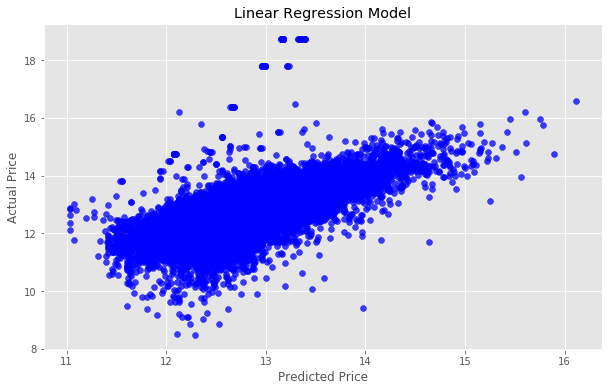

In [19]:
#========= Begin modelling =========================#
#    Linear Regression Model                        #
#===================================================#

# ---- first create a Linear Regression model.
# First, we instantiate the model.
lr = linear_model.LinearRegression()

# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

print("23 \n")

# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

print("24 \n")
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

26 



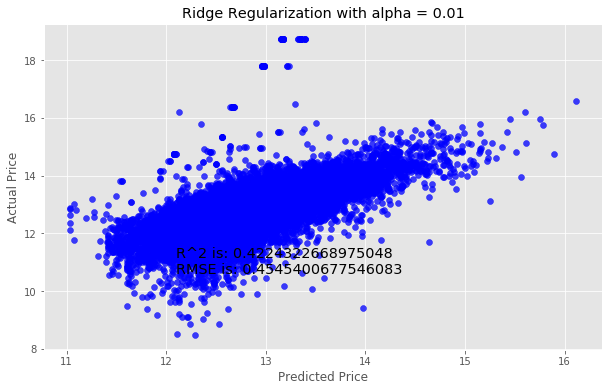

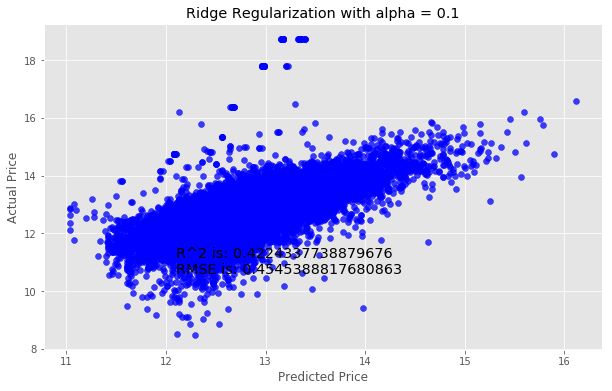

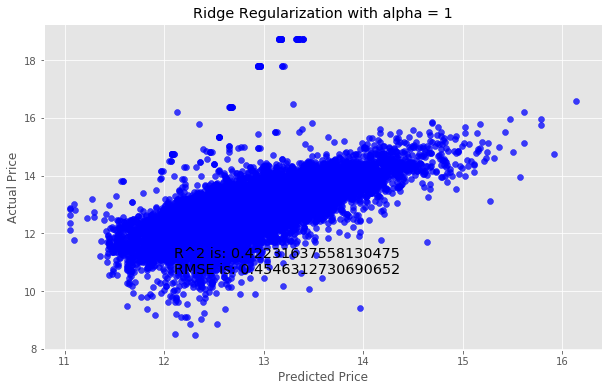

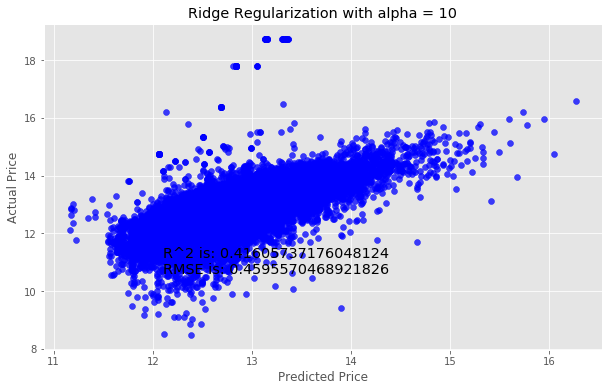

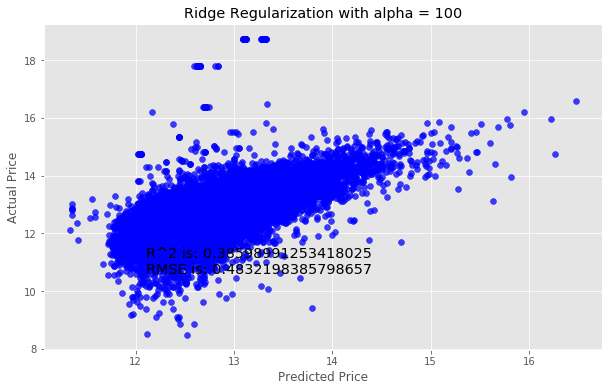

27 

R^2 is: 
 0.4224319323289288


In [20]:
#====== improve the model ================================================================#
#  try using Ridge Regularization to decrease the influence of less important features    #
#=========================================================================================#

print("26 \n")
# experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# if you examined the plots you can see these models perform almost identically to the first model.
# In our case, adjusting the alpha did not substantially improve our model.

print("27 \n")
print("R^2 is: \n", model.score(X_test, y_test))

In [24]:
######################################################
#    4.  Make a submission                          ##
######################################################

# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
submission['Id'] = test.Id


test["GBA"].fillna(1725.786303972366,inplace=True)
test["GRADE"].fillna(test["GRADE"].mode(),inplace=True)
test["CNDTN"].fillna(test["CNDTN"].mode(),inplace=True)

test['IsNew'] = test['AYB'].apply(lambda x: 1 if x > 2000 else 0)
test['IsRMDL'] = test['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
test["IsLARGE"] = test["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)

X=pd.get_dummies(X)

# select the features from the test data for the model as we did above.
feats = test.select_dtypes(
    include=[np.number]).drop(['Id',"LIVING_GBA","CMPLX_NUM","AYB","YR_RMDL","STORIES","X","Y","NUM_UNITS","KITCHENS"], axis=1).interpolate()

# generate predictions
predictions = model.predict(feats)

# transform the predictions to the correct form
# apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)

print("28 \n")

# check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

print("29 \n")
# assign these predictions and check
submission['PRICE'] = final_predictions
# submission.head()
print(submission.head())

# export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)


print("\n Finish")

28 

Original predictions are: 
 [13.21156657 14.10382236 14.01028337 14.24646305 14.36033808 13.39490626
 13.74720432 13.4421703  14.0141611  13.7833778 ] 

Final predictions are: 
 [ 546651.39241813 1334173.2403737  1215034.91606255 1538722.4431283
 1724310.95422072  656649.88896013  933974.40707495  688430.94561698
 1219755.64260254  968378.00932351]
29 

      Id         PRICE
0  49108  5.466514e+05
1  49109  1.334173e+06
2  49110  1.215035e+06
3  49111  1.538722e+06
4  49112  1.724311e+06

 Finish


In [25]:
submission.shape

(49108, 2)